In [1]:
#!python -m pip -q install git+https://github.com/aliechoes/iflai.git

In [2]:
from __future__ import print_function, division
import os
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import glob
from iflai.ml import AutoFeatureSelection
from iflai.utils import list_of_dict_to_dict
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.utils import shuffle
import skimage
plt.ion()   # interactive mode
from skimage.transform import   rescale, resize 
from imageio import imread
import random
#import umap
from tqdm import tqdm
from random import sample
from skimage.transform import resize
import h5py
from skimage.exposure import rescale_intensity
import seaborn as sns
from umap import UMAP

ModuleNotFoundError: No module named 'iflai'

In [ ]:


# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef, classification_report,confusion_matrix, accuracy_score, balanced_accuracy_score, cohen_kappa_score, f1_score,  precision_score, recall_score
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.dummy import DummyClassifier

def classification_complete_report(estimator, X, y_true, labels = None ,plot = True ): 
    y_pred = estimator.predict(X)
    y_pred_dummy = DummyClassifier().fit(X,y_true).predict(X)
    print(classification_report(y_true, y_pred, labels = labels))
    print(15*"----")
    print("No information rate: %.2f" % accuracy_score(y_true, y_pred_dummy) )
    print("matthews correlation coeff: %.2f" % (matthews_corrcoef(y_true, y_pred)) )
    print("Cohen Kappa score: %.2f" % (cohen_kappa_score(y_true, y_pred)) )
    print("Accuracy: %.2f & balanced Accuracy: %.2f" % (accuracy_score(y_true, y_pred), balanced_accuracy_score(y_true, y_pred)) )
    print("macro F1 score: %.2f & micro F1 score: %.2f" % (f1_score(y_true, y_pred, average = "macro"), f1_score(y_true, y_pred, average = "micro")) )
    print("macro Precision score: %.2f & micro Precision score: %.2f" % (precision_score(y_true, y_pred, average = "macro"), precision_score(y_true, y_pred, average = "micro")) )
    print("macro Recall score: %.2f & micro Recall score: %.2f" % (recall_score(y_true, y_pred, average = "macro"), recall_score(y_true, y_pred, average = "micro")) )
    print(15*"----")
    
    if plot:
        plot_confusion_matrix(estimator, X, y_true, labels = labels ,cmap = "Greys", xticks_rotation='vertical')
    

In [ ]:
from skimage.util import crop

def crop_pad_h_w(image_dummy,reshape_size):
    if image_dummy.shape[0] < reshape_size:
        h1_pad = ( reshape_size - image_dummy.shape[0])/2
        h1_pad = int(h1_pad)
        h2_pad =  reshape_size - h1_pad - image_dummy.shape[0]
        h1_crop = 0
        h2_crop = 0
    else:
        h1_pad = 0
        h2_pad = 0
        h1_crop = ( reshape_size - image_dummy.shape[0])/2
        h1_crop = abs(int(h1_crop))
        h2_crop = image_dummy.shape[0]- reshape_size  - h1_crop

    if image_dummy.shape[1] < reshape_size:
        w1_pad = (reshape_size - image_dummy.shape[1])/2
        w1_pad = int(w1_pad)
        w2_pad = reshape_size - w1_pad - image_dummy.shape[1]
        w1_crop = 0
        w2_crop = 0
    else:
        w1_pad = 0
        w2_pad = 0
        w1_crop = (reshape_size - image_dummy.shape[1])/2
        w1_crop = abs(int(w1_crop))
        w2_crop = image_dummy.shape[1]- reshape_size  - w1_crop

    h = [h1_crop, h2_crop, h1_pad, h2_pad]
    w = [w1_crop, w2_crop, w1_pad, w2_pad] 
    return h, w

In [4]:
metadata = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/metadata_subset.csv.gz")
metadata


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,file,experiment,donor,condition,object_number,set,label
0,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,5156,unlabeled,-1
1,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,32020,unlabeled,-1
2,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,55974,unlabeled,-1
3,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,15150,unlabeled,-1
4,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,44814,unlabeled,-1
...,...,...,...,...,...,...,...
1065962,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,72493,unlabeled,-1
1065963,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,106656,unlabeled,-1
1065964,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,110990,unlabeled,-1
1065965,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,DIG-TCB,71451,unlabeled,-1


In [ ]:

df_features = pd.read_csv("/projects/site/pred/data_science/year/2022/immunological_synapse/synapse_data_features/df_features_subset.csv.gz")
df_features

In [ ]:
classification_indx = ~df_features.columns.str.contains( "Antibody") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "Live-Dead") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "CD18")  
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2")  
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3")  
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8")  
classification_indx = classification_indx& ~df_features.columns.str.contains( "background") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "moment") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "percent") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "mask_based_mean") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "mask_based_min") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "mask_based_max")  
classification_indx = classification_indx& ~df_features.columns.str.contains( "RMS") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "intensity_BF") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R1_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R2_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R3_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R4_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R5_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R5_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R5_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R5_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R5_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R6_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R7_R8") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R1") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R2") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R3") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R4") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R5") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R6") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "_R8_R7") 
classification_indx = classification_indx& ~df_features.columns.str.contains( "cell_distance")

In [ ]:
# indx = metadata.condition != 'Abatacept'

# metadata = metadata.loc[indx,:].reset_index(drop = True)
# df_features = df_features.loc[indx,:].reset_index(drop = True)

In [ ]:
# indx = metadata.condition != 'Abatacept'

# metadata = metadata.loc[indx,:].reset_index(drop = True)
# df_features = df_features.loc[indx,:].reset_index(drop = True)

In [ ]:
set_of_interesting_classes = ['B_cell',  'T_cell', 
                        'T_cell_with_signaling',
                        'T_cell_with_B_cell_fragments',
                        'B_T_cell_in_one_layer',
                        'Synapses_without_signaling', 
                        'Synapses_with_signaling',
                        'No_cell_cell_interaction', 
                        'Multiplets'] 



labeled_index = metadata["label"].isin(set_of_interesting_classes)
labeled_index = labeled_index & metadata["condition"].isin(["-SEA","+SEA"])
labeled_index = labeled_index[labeled_index].index.tolist()


In [ ]:
from sklearn import manifold, datasets
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
 
indx = metadata.set.isin([ "train", "validation","test" ])
indx = indx & metadata.label.isin(set_of_interesting_classes)



In [ ]:
train_index = metadata["set"] == "train"
train_index = train_index & metadata.label.isin(set_of_interesting_classes)
train_index = train_index[train_index].index

validation_index = metadata["set"] == "validation"
validation_index = validation_index & metadata.label.isin(set_of_interesting_classes)
validation_index = validation_index[validation_index].index

test_index = metadata["set"] == "test"
test_index = test_index & metadata.label.isin(set_of_interesting_classes)
test_index = test_index[test_index].index

In [ ]:
from sklearn.metrics import f1_score
#range(5,150)

In [ ]:
top_k = 130

In [15]:
xgb = Pipeline([
                ('StandardScaler', StandardScaler()), 
                ('AutoFeatureSelection', AutoFeatureSelection( top_k = top_k )),
                 ('xgb', XGBClassifier(n_jobs = -1, 
                                       n_estimators = 100, 
                                       eval_metric = "logloss") )
        ], verbose=True)

xgb.fit(df_features.loc[train_index.tolist() + validation_index.tolist() , classification_indx],  
               metadata.loc[train_index.tolist() + validation_index.tolist() , "label"] )

[Pipeline] .... (step 1 of 3) Processing StandardScaler, total=   0.0s
[Pipeline]  (step 2 of 3) Processing AutoFeatureSelection, total= 1.5min
[Pipeline] ............... (step 3 of 3) Processing xgb, total= 1.3min


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('AutoFeatureSelection', AutoFeatureSelection(top_k=130)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scal

In [16]:
df_features.loc[train_index.tolist() + validation_index.tolist() , classification_indx]

,mask_based_area_BF,mask_based_bbox_area_BF,mask_based_convex_area_BF,mask_based_eccentricity_BF,mask_based_equivalent_diameter_BF,mask_based_euler_number_BF,mask_based_extent_BF,mask_based_feret_diameter_max_BF,mask_based_filled_area_BF,mask_based_major_axis_length_BF,...,max_intensity_ratio_F-Actin_R5_R7,sum_intensity_ratio_MHCII_R5_R7,mean_intensity_ratio_MHCII_R5_R7,max_intensity_ratio_MHCII_R5_R7,sum_intensity_ratio_CD3_R5_R7,mean_intensity_ratio_CD3_R5_R7,max_intensity_ratio_CD3_R5_R7,sum_intensity_ratio_P-CD3zeta_R5_R7,mean_intensity_ratio_P-CD3zeta_R5_R7,max_intensity_ratio_P-CD3zeta_R5_R7
35,975,1360,1038,0.500995,35.233628,1,0.716912,41.231056,975,38.199747,...,10.668067,0.876596,0.876596,22.071265,0.477492,0.477492,6.332233,0.504967,0.504967,10.060883
151,2604,4189,2928,0.705583,57.580516,1,0.621628,72.567210,2604,69.955337,...,12.273856,0.144901,0.144901,9.290865,0.210627,0.210627,13.074955,0.236844,0.236844,10.213907
188,2435,3245,2534,0.449196,55.680681,1,0.750385,63.324561,2435,60.146633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
199,1230,1666,1303,0.709915,39.573787,1,0.738295,49.648766,1230,47.466022,...,10.958942,0.417764,0.417764,57.392836,0.075989,0.075989,4.792500,0.085290,0.085290,4.736002
243,4412,7298,4897,0.829744,74.950203,1,0.604549,104.560987,4412,104.227190,...,3.574352,0.014690,0.014690,2.956999,0.074566,0.074566,16.145312,0.106819,0.106819,14.304128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998585,2789,4070,3116,0.785917,59.590814,1,0.685258,76.655072,2789,78.264624,...,10.056020,0.154133,0.154133,6.246949,0.258107,0.258107,10.450790,0.279569,0.279569,8.059949
1000511,883,1116,924,0.465553,33.530143,1,0.791219,37.161808,883,35.819531,...,9.911361,0.952768,0.952768,12.165976,0.984160,0.984160,10.709873,0.964279,0.964279,7.006058
1001734,2850,4042,3132,0.886017,60.238963,1,0.705096,87.132084,2850,90.501931,...,17.779088,0.090422,0.090422,10.297611,0.109804,0.109804,11.976239,0.157739,0.157739,9.920463
1004971,5476,10752,6856,0.725423,83.500058,1,0.509301,132.185476,5476,107.424423,...,32.554947,0.515087,0.515087,13.841511,0.397187,0.397187,15.829711,0.514052,0.514052,10.240976


In [17]:
metadata.loc[train_index.tolist() + validation_index.tolist() , :]

,file,experiment,donor,condition,object_number,set,label
35,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,57117,train,B_T_cell_in_one_layer
151,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,24497,train,Synapses_with_signaling
188,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,16268,train,B_cell
199,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,15738,train,T_cell_with_B_cell_fragments
243,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,7964,train,No_cell_cell_interaction
...,...,...,...,...,...,...,...
998585,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,-SEA,24897,validation,Synapses_without_signaling
1000511,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,-SEA,38099,validation,B_T_cell_in_one_layer
1001734,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,-SEA,20703,validation,Synapses_without_signaling
1004971,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_4,Donor_9,-SEA,32303,validation,Multiplets


In [18]:
from joblib import dump, load

dump(xgb, 'xgb.joblib') 

#xgb = load('xgb.joblib') 

['xgb.joblib']

                              precision    recall  f1-score   support

                      B_cell       0.99      1.00      1.00       190
                      T_cell       0.95      0.89      0.92       200
       T_cell_with_signaling       0.86      0.92      0.89       148
T_cell_with_B_cell_fragments       0.96      0.94      0.95       189
       B_T_cell_in_one_layer       0.91      0.95      0.93       161
  Synapses_without_signaling       0.85      0.91      0.88       147
     Synapses_with_signaling       0.89      0.85      0.87       196
    No_cell_cell_interaction       0.97      0.95      0.96       182
                  Multiplets       0.92      0.92      0.92       154

                    accuracy                           0.92      1567
                   macro avg       0.92      0.93      0.92      1567
                weighted avg       0.93      0.92      0.92      1567

------------------------------------------------------------
No information rate: 0.13


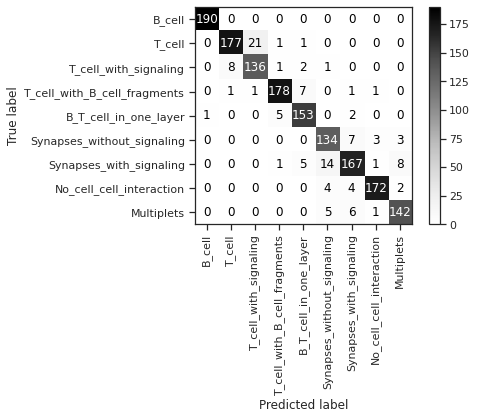

In [19]:
sns.set(font_scale = 1.0)
sns.set_style("ticks")
classification_complete_report(xgb, 
                               df_features.loc[test_index, classification_indx],
                               metadata.loc[test_index, "label"], labels = set_of_interesting_classes)

plt.savefig('3 - confusion matrix best model.png', bbox_inches="tight")
plt.savefig('3 - confusion matrix best model.svg', bbox_inches="tight")

                              precision    recall  f1-score   support

                      B_cell       1.00      0.97      0.98        29
                      T_cell       0.55      1.00      0.71        23
       T_cell_with_signaling       1.00      0.58      0.73        45
T_cell_with_B_cell_fragments       0.97      0.92      0.94        37
       B_T_cell_in_one_layer       0.75      0.92      0.83        13
  Synapses_without_signaling       0.71      1.00      0.83        20
     Synapses_with_signaling       0.84      0.73      0.78        22
    No_cell_cell_interaction       1.00      0.96      0.98        27
                  Multiplets       0.88      0.58      0.70        12

                    accuracy                           0.84       228
                   macro avg       0.86      0.85      0.83       228
                weighted avg       0.89      0.84      0.84       228

------------------------------------------------------------
No information rate: 0.20


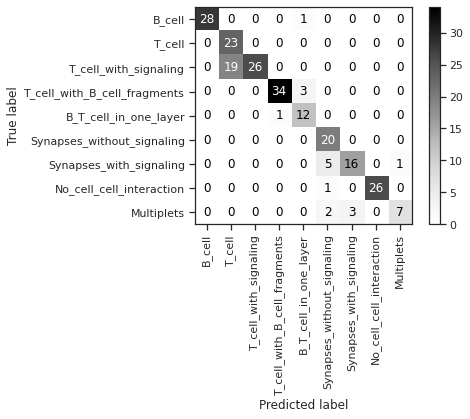

In [20]:
sns.set(font_scale = 1.0)
sns.set_style("ticks")

teplizumab_index = metadata.label.isin(set_of_interesting_classes)
teplizumab_index = teplizumab_index & metadata.condition.isin(["Teplizumab"])
classification_complete_report(xgb, 
                               df_features.loc[teplizumab_index, classification_indx],
                               metadata.loc[teplizumab_index, "label"], labels = set_of_interesting_classes)

plt.savefig('3 - confusion matrix teplizumab.png', bbox_inches="tight")
plt.savefig('3 - confusion matrix teplizumab.svg', bbox_inches="tight")

                              precision    recall  f1-score   support

                      B_cell       0.98      0.98      0.98        50
                      T_cell       0.82      1.00      0.90        31
       T_cell_with_signaling       0.95      0.78      0.86        23
T_cell_with_B_cell_fragments       0.86      0.81      0.84        47
       B_T_cell_in_one_layer       0.82      0.89      0.85        45
  Synapses_without_signaling       0.81      0.96      0.88        23
     Synapses_with_signaling       0.99      0.90      0.94        77
    No_cell_cell_interaction       0.58      0.88      0.70         8
                  Multiplets       0.98      0.93      0.95        95

                    accuracy                           0.91       399
                   macro avg       0.86      0.90      0.88       399
                weighted avg       0.92      0.91      0.91       399

------------------------------------------------------------
No information rate: 0.24


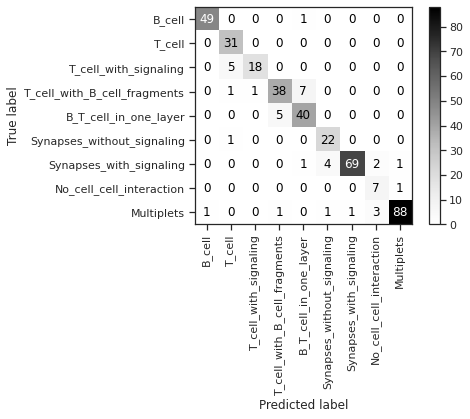

In [21]:
sns.set(font_scale = 1.0)
sns.set_style("ticks")

tcb_index = metadata.label.isin(set_of_interesting_classes)
tcb_index = tcb_index & metadata.condition.isin(["CD19-TCB"])
classification_complete_report(xgb, 
                               df_features.loc[tcb_index, classification_indx],
                               metadata.loc[tcb_index, "label"], labels = set_of_interesting_classes)

plt.savefig('3 - confusion matrix TCB-CD19.png', bbox_inches="tight")
plt.savefig('3 - confusion matrix TCB-CD19.svg', bbox_inches="tight")

In [22]:
sns.set(font_scale = 1.0)
sns.set_style("ticks")

abatacept_index = metadata.label.isin(set_of_interesting_classes)
abatacept_index = abatacept_index & metadata.condition.isin(["Abatacept"])
classification_complete_report(xgb, 
                               df_features.loc[abatacept_index, classification_indx],
                               metadata.loc[abatacept_index, "label"], labels = set_of_interesting_classes)

plt.savefig('3 - confusion matrix abatacept.png', bbox_inches="tight")
plt.savefig('3 - confusion matrix abatacept.svg', bbox_inches="tight")

ValueError: Found array with 0 sample(s) (shape=(0, 247)) while a minimum of 1 is required by StandardScaler.

## prediction on images and data cleaning

In [23]:
best_clf = xgb

In [24]:
metadata["prediction"] = best_clf.predict( df_features.loc[:, classification_indx] ) 

In [25]:
from scipy.stats import entropy
metadata["entropy"] = entropy(best_clf.predict_proba( df_features.loc[:, classification_indx] ), axis=1)


0.007994475827523476


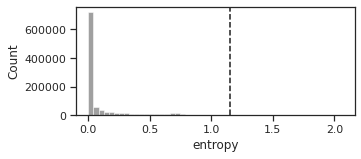

In [26]:

fig, ax = plt.subplots(figsize = (5,2))
ax = sns.histplot(data = metadata, 
                  x = "entropy", 
                  bins = 50, 
                  color = "grey", 
                  ax = ax)

ax.axvline( metadata["entropy"].quantile(0.99), c = "k", ls = "--")
print((metadata["entropy"] >= 1.2).mean())
plt.savefig('3 - Data cleaning pipeline: high entropy values.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: high entropy values.svg', bbox_inches="tight")

In [27]:
indx1 = metadata["entropy"] >= 1.2
metadata.loc[indx1,"prediction"] = "high_entropy"

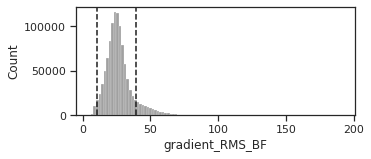

In [28]:

fig, ax = plt.subplots(figsize = (5,2))
ax = sns.histplot(data = df_features, 
                  x = "gradient_RMS_BF", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)

ax.axvline( df_features["gradient_RMS_BF"].quantile(0.02), c = "k", ls = "--")
ax.axvline( df_features["gradient_RMS_BF"].quantile(0.90), c = "k", ls = "--")
plt.savefig('3 - Data cleaning pipeline: gradient_RMS_BF.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: gradient_RMS_BF.svg', bbox_inches="tight")

In [29]:
indx1 = df_features.loc[:, "gradient_RMS_BF"] < np.percentile(df_features.loc[:, "gradient_RMS_BF"], 2)
metadata.loc[indx1,"prediction"] = "out_of_focus"
print(np.percentile(df_features.loc[:, "gradient_RMS_BF"], 2))

10.765415505233966


In [30]:
indx1 = df_features.loc[:, "gradient_RMS_BF"] > np.percentile(df_features.loc[:, "gradient_RMS_BF"], 90)
metadata.loc[indx1,"prediction"] = "out_of_focus"
print(np.percentile(df_features.loc[:, "gradient_RMS_BF"], 90))

39.27006572962782


220.2687165775401


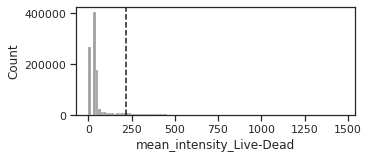

In [31]:
 
fig, ax = plt.subplots(figsize = (5,2))
ax = sns.histplot(data = df_features, 
                  x = "mean_intensity_Live-Dead", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)

ax.axvline( df_features["mean_intensity_Live-Dead"].quantile(0.90), c = "k", ls = "--")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_Live-Dead.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_Live-Dead.svg', bbox_inches="tight")
print(df_features["mean_intensity_Live-Dead"].quantile(0.90))

In [32]:
indx = df_features.loc[:, 'mean_intensity_Live-Dead'] > df_features.loc[:, 'mean_intensity_Live-Dead'].quantile(0.90)
metadata.loc[indx , "prediction"] = "Dead_Cell"

39.275115919629066


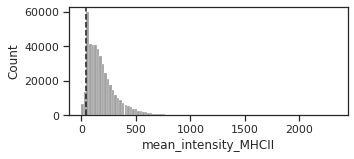

In [33]:

indx = metadata.loc[: , "prediction"] == "B_cell"

fig, ax = plt.subplots(figsize = (5,2))
ax = sns.histplot(data = df_features.loc[indx,:], 
                  x = "mean_intensity_MHCII", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)

ax.axvline( df_features["mean_intensity_MHCII"].quantile(0.05), c = "k", ls = "--")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_MHCII.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_MHCII.svg', bbox_inches="tight")
print(df_features["mean_intensity_MHCII"].quantile(0.05))

In [34]:
indx = metadata.loc[: , "prediction"] == "B_cell"
indx = indx & (df_features.loc[:, 'mean_intensity_MHCII'] < df_features.loc[indx, 'mean_intensity_MHCII'].quantile(0.05))
metadata.loc[indx , "prediction"] = "B_cell_with_low_intensity"

488.0


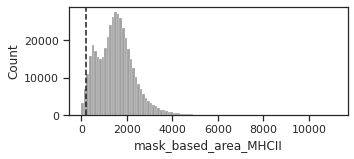

In [35]:
## delteing B cells with small values
indx = metadata.loc[: , "prediction"] == "B_cell"

fig, ax = plt.subplots(figsize = (5,2))
ax = sns.histplot(data = df_features.loc[indx,:], 
                  x = "mask_based_area_MHCII", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)
 
ax.axvline( df_features["mask_based_area_MHCII"].quantile(0.10), c = "k", ls = "--")
plt.savefig('3 - Data cleaning pipeline: mask_based_area_MHCII.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: mask_based_area_MHCII.svg', bbox_inches="tight") 
print(df_features.loc[indx, 'mask_based_area_MHCII'].quantile(0.10))

In [36]:
indx = metadata.loc[: , "prediction"] == "B_cell"
indx = indx & (df_features.loc[:, 'mask_based_area_MHCII'] < df_features.loc[indx, 'mask_based_area_MHCII'].quantile(0.10))
metadata.loc[indx , "prediction"] = "B_cell_with_small_area"

85.19316298906936


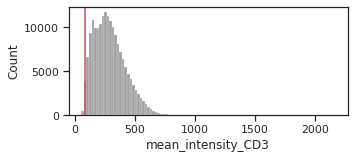

In [37]:
## delteing B cells with small values
fig, ax = plt.subplots(figsize = (5,2))
indx = metadata.loc[: , "prediction"] == "T_cell"
ax = sns.histplot(data = df_features.loc[indx,:], 
                  x = "mean_intensity_CD3", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)

ax.axvline(df_features.loc[indx, 'mean_intensity_CD3'].quantile(0.01), c = "r")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_CD3.png', bbox_inches="tight")
plt.savefig('3 - Data cleaning pipeline: mean_intensity_CD3.svg', bbox_inches="tight") 
print(df_features.loc[indx, 'mean_intensity_CD3'].quantile(0.01))

In [38]:
indx = metadata.loc[: , "prediction"] == "T_cell"
indx = indx & (df_features.loc[:, 'mean_intensity_CD3'] < df_features.loc[indx, 'mean_intensity_CD3'].quantile(0.01))
metadata.loc[indx , "prediction"] = "T_cell_with_low_intensity"

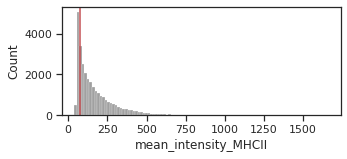

In [39]:
## delteing B cells with small values
fig, ax = plt.subplots(figsize = (5,2))
indx = metadata.loc[: , "prediction"] == "B_T_cell_in_one_layer"
ax = sns.histplot(data = df_features.loc[indx,:], 
                  x = "mean_intensity_MHCII", 
                  bins = 100, 
                  color = "grey", 
                  ax = ax)

ax.axvline(df_features.loc[indx, 'mean_intensity_MHCII'].quantile(0.20), c = "r")

In [40]:
indx = metadata.loc[: , "prediction"] == "B_T_cell_in_one_layer"
indx = indx & (df_features.loc[:, 'mean_intensity_MHCII'] < df_features.loc[indx, 'mean_intensity_MHCII'].quantile(0.20))
metadata.loc[indx , "prediction"] = "T_cell_with_B_cell_fragments"

In [41]:
metadata["key"] = metadata["experiment"] + " " +  metadata["donor"] 

In [42]:
all_combinations = metadata.groupby(["experiment", "donor", "condition"]).size().reset_index().iloc[:,:-1]
all_combinations

,experiment,donor,condition
0,Experiment_1,Donor_1,+SEA
1,Experiment_1,Donor_1,-SEA
2,Experiment_1,Donor_1,Isotype
3,Experiment_1,Donor_1,Teplizumab
4,Experiment_1,Donor_2,+SEA
5,Experiment_1,Donor_2,-SEA
6,Experiment_1,Donor_2,Isotype
7,Experiment_1,Donor_2,Teplizumab
8,Experiment_2,Donor_3,+SEA
9,Experiment_2,Donor_3,-SEA


In [43]:
set_of_interesting_classes

['B_cell',
 'T_cell',
 'T_cell_with_signaling',
 'T_cell_with_B_cell_fragments',
 'B_T_cell_in_one_layer',
 'Synapses_without_signaling',
 'Synapses_with_signaling',
 'No_cell_cell_interaction',
 'Multiplets']

the 30 selected features are calculated based on the `Channel_feature_importance.ipynb` with multiple repeated cross validations

In [45]:

selected_feature_names = ['correlation_distance_R5_MHCII_R6_CD3',
 'correlation_CD3',
 'skew_intensity_P-CD3zeta',
 'mask_based_solidity_CD3',
 'manders_overlap_coefficient_R5_MHCII_R7_P-CD3zeta',
 'kurtosis_intensity_P-CD3zeta',
 'dice_distance_BF_CD3',
 'homogeneity_CD3',
 'intensity_correlation_quotient_R5_MHCII_R6_CD3',
 'manders_overlap_coefficient_R5_MHCII_R6_CD3',
 'contrast_MHCII',
 'mask_based_bbox_area_CD3',
 'mean_intensity_MHCII',
 'euclidean_distance_R5_MHCII_R6_CD3', 
 'correlation_P-CD3zeta',
 'kurtosis_intensity_CD3',
 'homogeneity_MHCII',
 'mask_based_feret_diameter_max_CD3',
 'sum_intensity_CD3',
 'sum_intensity_F-Actin',
 'contrast_CD3',
 'sum_intensity_ratio_CD3_R5_R6',
 'mask_based_area_CD3', 
 'std_intensity_P-CD3zeta', 
 'ASM_CD3',
 'mask_based_feret_diameter_max_BF',
 'contrast_P-CD3zeta',
 'mask_based_extent_BF',
 'mask_based_equivalent_diameter_BF',
 'homogeneity_BF',
 'homogeneity_F-Actin',
 'sum_intensity_ratio_MHCII_R5_R6',
 'mask_based_eccentricity_BF',
 'dissimilarity_MHCII',
 'mask_based_eccentricity_MHCII',
 'correlation_MHCII',
 'structural_similarity_R4_F-Actin_R5_MHCII',
 'correlation_F-Actin',
 'correlation_BF',
 'dissimilarity_CD3',
 'max_intensity_ratio_F-Actin_R5_R6',
 'mean_intensity_CD3'] + [
     
    "max_intensity_ratio_F-Actin_R5_R6", 
    "max_intensity_ratio_MHCII_R5_R6", 
    "max_intensity_ratio_CD3_R5_R6", 
    "max_intensity_ratio_P-CD3zeta_R5_R6",
    
    "mean_intensity_ratio_F-Actin_R5_R6", 
    "mean_intensity_ratio_MHCII_R5_R6", 
    "mean_intensity_ratio_CD3_R5_R6", 
    "mean_intensity_ratio_P-CD3zeta_R5_R6",
    
    "dissimilarity_F-Actin",
    "dissimilarity_MHCII",
    "dissimilarity_CD3",
    "dissimilarity_P-CD3zeta",
    
    'correlation_F-Actin',
    'correlation_MHCII',
    'correlation_CD3',
    'correlation_P-CD3zeta',
    
    'mask_based_major_axis_length_F-Actin',
    'mask_based_major_axis_length_MHCII',
    'mask_based_major_axis_length_CD3',
    'mask_based_major_axis_length_P-CD3zeta',
    
    'mask_based_solidity_F-Actin',
    'mask_based_solidity_MHCII',
    'mask_based_solidity_CD3',
    'mask_based_solidity_P-CD3zeta',
    
    "mask_based_eccentricity_Antibody",
    "mask_based_eccentricity_F-Actin",
    "mask_based_eccentricity_MHCII",
    "mask_based_eccentricity_CD3",
    "mask_based_eccentricity_P-CD3zeta",  
    
    'mean_intensity_F-Actin',
    'mean_intensity_MHCII',
    'mean_intensity_CD3',
    'mean_intensity_P-CD3zeta',
    
    'skew_intensity_F-Actin',
    'skew_intensity_MHCII',
    'skew_intensity_CD3',
    'skew_intensity_P-CD3zeta',
]    

In [46]:
selected_feature_names = set(selected_feature_names)
selected_feature_names = list(selected_feature_names)

In [47]:
from sklearn.ensemble import IsolationForest


metadata["outlier"] = 0
metadata["cluster"] = 0

isolation_forest = IsolationForest(max_features = 30, 
                                   n_jobs=-1).fit(StandardScaler().fit_transform(df_features.loc[:, selected_feature_names]))
indx = isolation_forest.predict(StandardScaler().fit_transform(df_features.loc[:, selected_feature_names])) == -1
metadata.loc[indx, "outlier"] = 1
isolation_forest = None

In [48]:
import umap

In [49]:
from sklearn.cluster import DBSCAN
from umap import UMAP

X_transformed = UMAP(n_components=2, n_jobs=-1).fit_transform(StandardScaler().fit_transform(df_features.loc[:, selected_feature_names]))


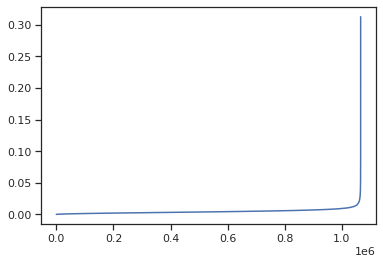

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_transformed)
distances, indices = nbrs.kneighbors(X_transformed)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [51]:
db_scan = DBSCAN(eps = 0.09 ,
                 n_jobs = -1).fit(X_transformed)

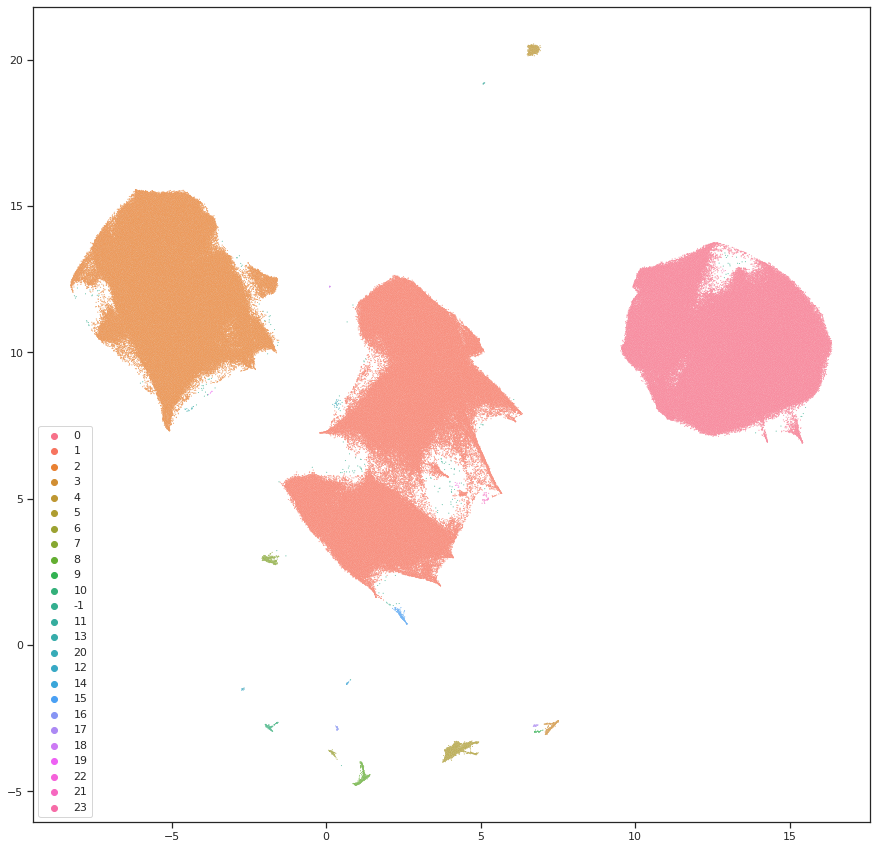

In [52]:
fig , ax = plt.subplots(1, figsize = (15,15) )

ax = sns.scatterplot(x = X_transformed[:,0],
                     y = X_transformed[:,1],
                     hue = db_scan.labels_.astype(str),#  metadata["prediction"]
                     s = 1, 
                     ax = ax )  

In [53]:
metadata["cluster"] = db_scan.labels_
metadata["outlier"] = db_scan.labels_ == -1

In [54]:
X_transformed = None
db_scan = None

In [55]:
metadata.cluster.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, -1, 11, 13, 20, 12, 14,
       15, 16, 17, 18, 19, 22, 21, 23])

In [56]:
metadata.cluster.value_counts()/len(metadata)

 0     0.355973
 1     0.330977
 2     0.293704
 5     0.005865
 4     0.003287
 3     0.002734
 8     0.002720
 10    0.001648
 7     0.001077
 6     0.000521
 15    0.000281
 11    0.000277
 12    0.000247
 16    0.000246
-1     0.000172
 14    0.000064
 17    0.000063
 9     0.000054
 21    0.000029
 20    0.000022
 13    0.000012
 18    0.000010
 22    0.000008
 23    0.000005
 19    0.000005
Name: cluster, dtype: float64

                                                      file    experiment  \
81       /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
229      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
338      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
357      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
378      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
...                                                    ...           ...   
1064997  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065205  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065244  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065469  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065692  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   

           donor condition  object_number        set    label    prediction  \
81      

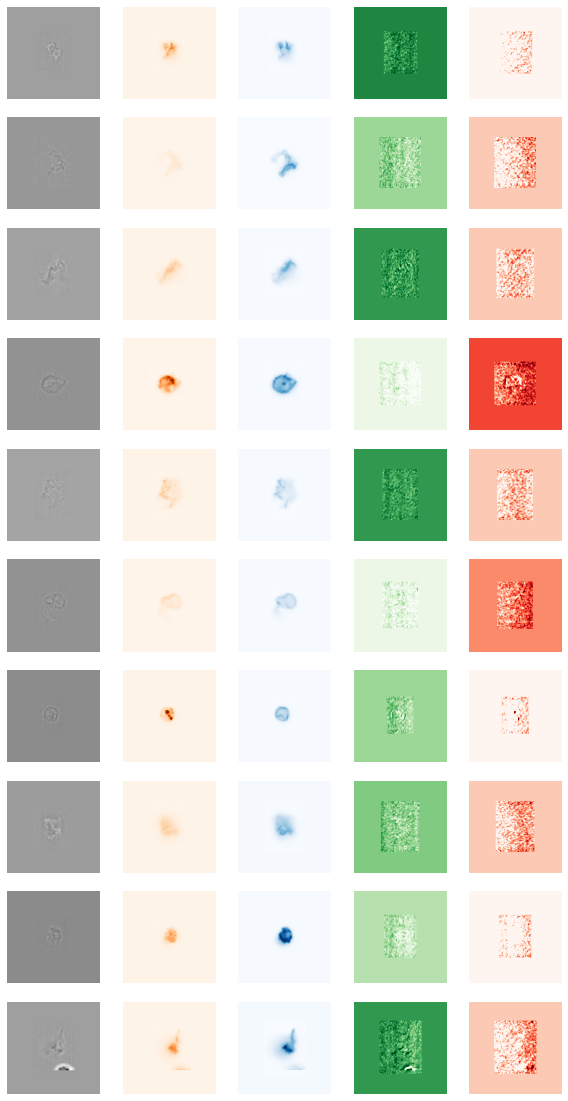

In [64]:

k = 10
image_size = 128
channels_to_be_plotted = [0,3,4,5,6]
channel_colors = ["Greys","Oranges" ,"Blues","Greens","Reds"]

cl = 4    
indx = metadata.cluster == cl
print(metadata.loc[indx, :])
files = metadata.loc[indx, "file"].sample(k,replace=True).tolist()

nrows = k
ncols = len(channels_to_be_plotted)

fix,ax = plt.subplots(nrows, ncols, figsize = ( ncols*2, nrows*2 ))
    
vmin = [4095.]*ncols
vmax = [0.]*ncols

for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    mask = h5_file_.get("mask")[()]
    for j, ch in enumerate(channels_to_be_plotted):
        if j>0:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.40)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 0.99)  )
        else:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.0)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 1.0)  )

        
print(vmin,vmax)
for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    h, w = crop_pad_h_w(image, image_size)
    h1_crop, h2_crop, h1_pad, h2_pad =  h 
    w1_crop, w2_crop, w1_pad, w2_pad = w 
    for j, ch in enumerate(channels_to_be_plotted):
            image_dummy = crop(image[:,:,ch], ((h1_crop,h2_crop),(w1_crop,w2_crop)))
            image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values=np.median(image_dummy) )
            ax[i,j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j]  )
            ax[i,j].axis('off')
    h5_file_.close()

#plt.savefig('Figure 2/ sample images.svg', bbox_inches="tight")

                                                      file    experiment  \
797      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
13854    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
27680    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
34852    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
84320    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
88476    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
89460    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
91227    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
91582    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
94798    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
98288    /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
101423   /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
150475   /ps

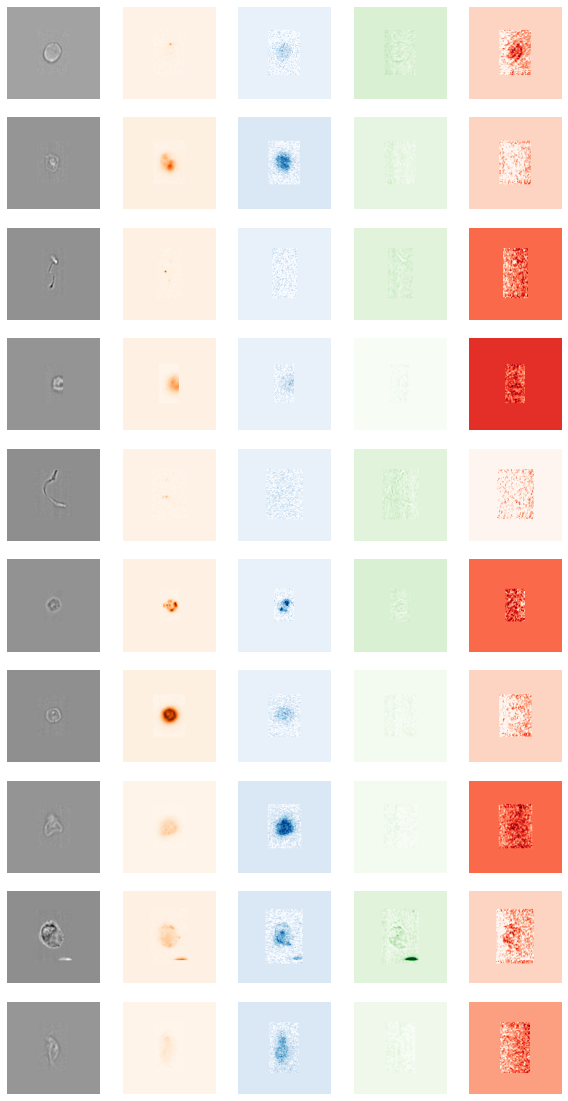

In [58]:

k = 10
image_size = 128
channels_to_be_plotted = [0,3,4,5,6]
channel_colors = ["Greys","Oranges" ,"Blues","Greens","Reds"]

cl = 9    
indx = metadata.cluster == cl
print(metadata.loc[indx, :])
files = metadata.loc[indx, "file"].sample(k,replace=True).tolist()

nrows = k
ncols = len(channels_to_be_plotted)

fix,ax = plt.subplots(nrows, ncols, figsize = ( ncols*2, nrows*2 ))
    
vmin = [4095.]*ncols
vmax = [0.]*ncols

for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    mask = h5_file_.get("mask")[()]
    for j, ch in enumerate(channels_to_be_plotted):
        if j>0:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.40)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 0.99)  )
        else:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.0)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 1.0)  )

        
print(vmin,vmax)
for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    h, w = crop_pad_h_w(image, image_size)
    h1_crop, h2_crop, h1_pad, h2_pad =  h 
    w1_crop, w2_crop, w1_pad, w2_pad = w 
    for j, ch in enumerate(channels_to_be_plotted):
            image_dummy = crop(image[:,:,ch], ((h1_crop,h2_crop),(w1_crop,w2_crop)))
            image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values=np.median(image_dummy) )
            ax[i,j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j]  )
            ax[i,j].axis('off')
    h5_file_.close()

#plt.savefig('Figure 2/ sample images.svg', bbox_inches="tight")

                                                      file    experiment  \
762      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
1038     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
2778     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
2877     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
3120     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
...                                                    ...           ...   
1062328  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1063170  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1064052  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1064606  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065181  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   

           donor condition  object_number        set label  \
762      Donor_1      +SE

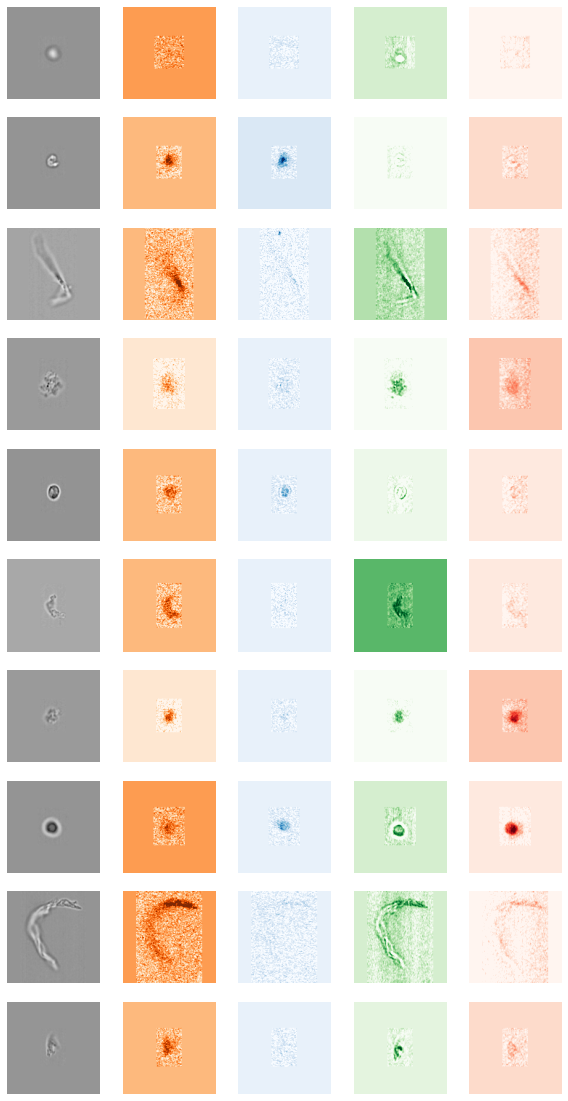

In [59]:

k = 10
image_size = 128
channels_to_be_plotted = [0,3,4,5,6]
channel_colors = ["Greys","Oranges" ,"Blues","Greens","Reds"]

cl = 8    
indx = metadata.cluster == cl
print(metadata.loc[indx, :])
files = metadata.loc[indx, "file"].sample(k,replace=True).tolist()

nrows = k
ncols = len(channels_to_be_plotted)

fix,ax = plt.subplots(nrows, ncols, figsize = ( ncols*2, nrows*2 ))
    
vmin = [4095.]*ncols
vmax = [0.]*ncols

for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    mask = h5_file_.get("mask")[()]
    for j, ch in enumerate(channels_to_be_plotted):
        if j>0:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.40)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 0.99)  )
        else:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.0)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 1.0)  )

        
print(vmin,vmax)
for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    h, w = crop_pad_h_w(image, image_size)
    h1_crop, h2_crop, h1_pad, h2_pad =  h 
    w1_crop, w2_crop, w1_pad, w2_pad = w 
    for j, ch in enumerate(channels_to_be_plotted):
            image_dummy = crop(image[:,:,ch], ((h1_crop,h2_crop),(w1_crop,w2_crop)))
            image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values=np.median(image_dummy) )
            ax[i,j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j]  )
            ax[i,j].axis('off')
    h5_file_.close()

#plt.savefig('Figure 2/ sample images.svg', bbox_inches="tight")

                                                      file    experiment  \
677      /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
1143     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
2074     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
3452     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
6790     /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_1   
...                                                    ...           ...   
1062789  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1063222  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1064432  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065583  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   
1065769  /pstore/data/DS4/synapse_formation_full_data/E...  Experiment_4   

           donor condition  object_number        set label    prediction  \
677      Do

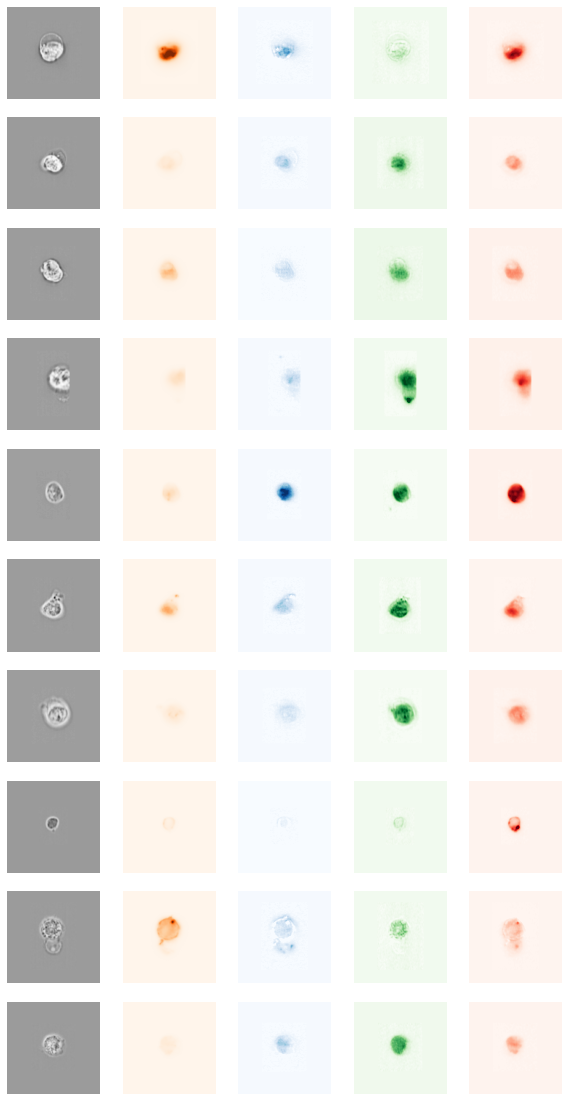

In [60]:

k = 10
image_size = 128
channels_to_be_plotted = [0,3,4,5,6]
channel_colors = ["Greys","Oranges" ,"Blues","Greens","Reds"]

cl = 7    
indx = metadata.cluster == cl
print(metadata.loc[indx, :])
files = metadata.loc[indx, "file"].sample(k,replace=True).tolist()

nrows = k
ncols = len(channels_to_be_plotted)

fix,ax = plt.subplots(nrows, ncols, figsize = ( ncols*2, nrows*2 ))
    
vmin = [4095.]*ncols
vmax = [0.]*ncols

for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    mask = h5_file_.get("mask")[()]
    for j, ch in enumerate(channels_to_be_plotted):
        if j>0:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.40)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 0.99)  )
        else:
            vmin[j] = min(vmin[j], np.quantile(image[:,:,ch], 0.0)  )
            vmax[j] = max(vmax[j], np.quantile(image[:,:,ch], 1.0)  )

        
print(vmin,vmax)
for i in range(nrows):
    h5_file_ = h5py.File(files[i], "r")
    image = h5_file_.get("image")[()]
    h, w = crop_pad_h_w(image, image_size)
    h1_crop, h2_crop, h1_pad, h2_pad =  h 
    w1_crop, w2_crop, w1_pad, w2_pad = w 
    for j, ch in enumerate(channels_to_be_plotted):
            image_dummy = crop(image[:,:,ch], ((h1_crop,h2_crop),(w1_crop,w2_crop)))
            image_dummy = np.pad(image_dummy, 
                                     ((h1_pad,h2_pad),(w1_pad,w2_pad)), 
                                     'constant', 
                                     constant_values=np.median(image_dummy) )
            ax[i,j].imshow(image_dummy, cmap = channel_colors[j] , vmin = vmin[j], vmax = vmax[j]  )
            ax[i,j].axis('off')
    h5_file_.close()

#plt.savefig('Figure 2/ sample images.svg', bbox_inches="tight")

In [61]:

threshold = 0.01
for clus in metadata.cluster.unique():
    if (metadata.cluster == clus).mean() <= threshold:
        indx = metadata.cluster == clus
        metadata.loc[indx, "outlier"] = 1

In [62]:
metadata.to_csv("/pstore/data/DS4/synapse_data_features/metadata_subset_with_predictions.csv.gz" ,
           index=False, 
           compression="gzip")

In [ ]:
# df_features.to_csv("/pstore/data/DS4/synapse_data_features/df_features_subset_with_predictions.csv.gz" ,
#            index=False, 
#            compression="gzip")

# How many labeled sampled are needed

In [ ]:
f1_score_values = []
n_repeat = 10

for _ in tqdm(range(n_repeat)):
    for train_size in range(5,100,5):
        X_train, _, y_train, _  = train_test_split(df_features.loc[train_index.tolist() + 
                                                             validation_index.tolist(), 
                                                             classification_indx], 
                                             metadata.loc[train_index.tolist() + 
                                                          validation_index.tolist(),
                                                          "label"],
                                             train_size = train_size/100., 
                                             stratify = metadata.loc[train_index.tolist() + 
                                                                     validation_index.tolist(),
                                                                     "label"])
        xgb_reduced = Pipeline([
                        ('StandardScaler', StandardScaler()), 
                        #('AutoFeatureSelection', AutoFeatureSelection( top_k = top_k )),
                         ('xgb', XGBClassifier(n_jobs = -1, 
                                               n_estimators = 100, 
                                               eval_metric = "logloss") )
                ], verbose=False)

        xgb_reduced.fit(X_train,  y_train )

        f1_score_values.append({
            "train_percentage" : train_size,
            "f1-macro" : f1_score(metadata.loc[test_index ,"label"],
                                 xgb_reduced.predict(df_features.loc[test_index, classification_indx]),
                                 average = "macro"),

        })

In [ ]:
f1_score_values = pd.DataFrame(f1_score_values)


In [ ]:
fig, ax  = plt.subplots()

ax = sns.lineplot(data = f1_score_values,
        x = "train_percentage",
        y = "f1-macro",
        palette =  "Greys" ,
        ax = ax)
ax.set_xticks(range(10,110,10))
ax.set_yticks((np.linspace(70,95, 5)/100.).round(2))
plt.savefig('3 - needed data for training the model lineplot.svg', bbox_inches="tight")

In [ ]:
fig, ax  = plt.subplots()

ax = sns.pointplot(data = f1_score_values,
        x = "train_percentage",
        y = "f1-macro",
        ax = ax) 
plt.savefig('3 - needed data for training the model pointplot.svg', bbox_inches="tight")